In [1]:
include("DelayedMatrices.jl")
include("TurtleSearch.jl")
using .DelayedMatrices, .TurtleSearch

In [2]:
include("eom.jl")
using .GoldbergerWiseEoM

In [3]:
function paramsearch_l2_m2(l2, m2)
    gamma2  = 1e1
    FP = 1.
    params = (m2, l2, gamma2)
    return errBCwithφ(FP, params)
end

paramsearch_l2_m2 (generic function with 1 method)

In [20]:
m = DelayedMatrix(zeros(100,200), paramsearch_l2_m2, (-4,1),(-8,-3));

In [21]:
poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
t = Turtles(max(poses...))
inds = bisearch(t, m)
ys = [m.xaxis(inds[1])]
xs = [m.yaxis(inds[2])]
println((xs[1], ys[1]))
while nothing != next!(t, m)
    inds = bisearch(t, m)
    push!(ys,m.xaxis(inds[1]))
    push!(xs,m.yaxis(inds[2]))
end

(8.431958695957608e-5, 0.0001)


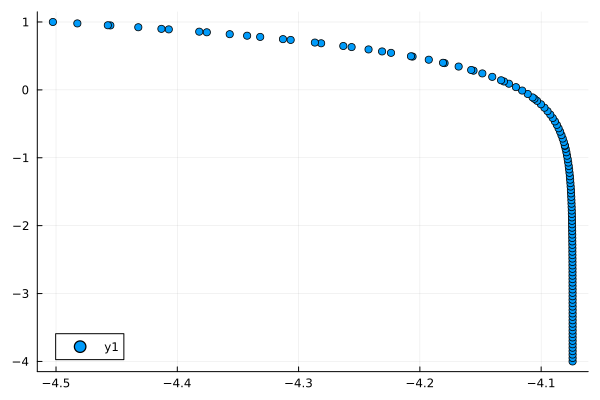

In [22]:
using Plots
scatter(log10.(xs),log10.(ys))